In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)

638

In [3]:
main_df = pd.DataFrame(cities,columns=["City"])
main_df

,City
0,hithadhoo
1,castro
2,invermere
3,cayambe
4,jardim
...,...
633,verkhnevilyuysk
634,yeppoon
635,pacific grove
636,kamenskoye


In [4]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"
 
count = 0
set_count = 0
# use iterrows to iterate through pandas dataframe
for index, row in main_df.iterrows():
    
    count +=1
    
    # get restaurant type from df
    City = row['City']

    response = requests.get(base_url + "&q=" + City) 
    response_json = response.json()
   
    if count == 50:
        count = 1
        set_count += 1
    
    try:
        print(f"Processing Record {count} of Set {set_count} | {City}")
               
        main_df.loc[index, 'Lat'] = response_json["coord"]["lat"]
        main_df.loc[index, 'Lng'] = response_json["coord"]["lon"]
        main_df.loc[index, 'Max Temp'] = (response_json["main"]["temp_max"]-273.15)*9/5 +32
        main_df.loc[index, 'Humidity']  = response_json["main"]["humidity"]
        main_df.loc[index, 'Cloudiness']  = response_json["clouds"]["all"]
        main_df.loc[index, 'Wind Speed']  = response_json["wind"]["speed"]
        main_df.loc[index, 'Country']  = response_json["sys"]["country"]
        main_df.loc[index, 'Date']  = response_json["dt"]
        
    except (KeyError, IndexError):
        print("City not found. Skipping....")
            

Processing Record 1 of Set 0 | hithadhoo
Processing Record 2 of Set 0 | castro
Processing Record 3 of Set 0 | invermere
Processing Record 4 of Set 0 | cayambe
Processing Record 5 of Set 0 | jardim
Processing Record 6 of Set 0 | bulalacao
Processing Record 7 of Set 0 | yongan
Processing Record 8 of Set 0 | busselton
Processing Record 9 of Set 0 | hirara
Processing Record 10 of Set 0 | barinitas
Processing Record 11 of Set 0 | avarua
Processing Record 12 of Set 0 | decatur
Processing Record 13 of Set 0 | qaanaaq
Processing Record 14 of Set 0 | rikitea
Processing Record 15 of Set 0 | nikolskoye
Processing Record 16 of Set 0 | saldanha
Processing Record 17 of Set 0 | ilulissat
Processing Record 18 of Set 0 | ribeira grande
Processing Record 19 of Set 0 | mar del plata
Processing Record 20 of Set 0 | naze
Processing Record 21 of Set 0 | barrow
Processing Record 22 of Set 0 | ushuaia
Processing Record 23 of Set 0 | tsentralnyy
City not found. Skipping....
Processing Record 24 of Set 0 | peve

Processing Record 48 of Set 3 | orapa
Processing Record 49 of Set 3 | manado
Processing Record 1 of Set 4 | kapuskasing
Processing Record 2 of Set 4 | knysna
Processing Record 3 of Set 4 | redmond
Processing Record 4 of Set 4 | port hedland
Processing Record 5 of Set 4 | richards bay
Processing Record 6 of Set 4 | amarante do maranhao
Processing Record 7 of Set 4 | najran
Processing Record 8 of Set 4 | kahului
Processing Record 9 of Set 4 | gigmoto
Processing Record 10 of Set 4 | kedougou
Processing Record 11 of Set 4 | calvinia
Processing Record 12 of Set 4 | salalah
Processing Record 13 of Set 4 | nabire
Processing Record 14 of Set 4 | nouadhibou
Processing Record 15 of Set 4 | vanderhoof
Processing Record 16 of Set 4 | bredy
Processing Record 17 of Set 4 | anapoima
Processing Record 18 of Set 4 | tingi
Processing Record 19 of Set 4 | rio rancho
Processing Record 20 of Set 4 | tanout
Processing Record 21 of Set 4 | lubin
Processing Record 22 of Set 4 | sao filipe
Processing Record 23

Processing Record 39 of Set 7 | saint-leu
Processing Record 40 of Set 7 | magistralnyy
Processing Record 41 of Set 7 | shenjiamen
Processing Record 42 of Set 7 | kolosovka
Processing Record 43 of Set 7 | faya
Processing Record 44 of Set 7 | dunedin
Processing Record 45 of Set 7 | krasnoyarka
Processing Record 46 of Set 7 | kieta
Processing Record 47 of Set 7 | lamu
Processing Record 48 of Set 7 | mackay
Processing Record 49 of Set 7 | tomatlan
Processing Record 1 of Set 8 | goderich
Processing Record 2 of Set 8 | tabiauea
City not found. Skipping....
Processing Record 3 of Set 8 | oktyabrskiy
Processing Record 4 of Set 8 | almaty
Processing Record 5 of Set 8 | inirida
Processing Record 6 of Set 8 | voyvozh
Processing Record 7 of Set 8 | tumaco
Processing Record 8 of Set 8 | medvedovskaya
Processing Record 9 of Set 8 | tucuma
Processing Record 10 of Set 8 | risti
Processing Record 11 of Set 8 | baiyin
Processing Record 12 of Set 8 | coquimbo
Processing Record 13 of Set 8 | ulladulla
Pro

Processing Record 29 of Set 11 | sao jose da coroa grande
Processing Record 30 of Set 11 | aksu
Processing Record 31 of Set 11 | loandjili
Processing Record 32 of Set 11 | sfantu gheorghe
Processing Record 33 of Set 11 | washington
Processing Record 34 of Set 11 | blonduos
City not found. Skipping....
Processing Record 35 of Set 11 | mayo
Processing Record 36 of Set 11 | sitka
Processing Record 37 of Set 11 | sorgun
Processing Record 38 of Set 11 | makakilo city
Processing Record 39 of Set 11 | grand forks
Processing Record 40 of Set 11 | mustasaari
Processing Record 41 of Set 11 | benghazi
Processing Record 42 of Set 11 | rincon
Processing Record 43 of Set 11 | bulawayo
Processing Record 44 of Set 11 | weligama
Processing Record 45 of Set 11 | kaputa
Processing Record 46 of Set 11 | dieppe bay
City not found. Skipping....
Processing Record 47 of Set 11 | bhuban
Processing Record 48 of Set 11 | svetlogorsk
Processing Record 49 of Set 11 | gambela
Processing Record 1 of Set 12 | nioki
P

In [5]:
new_df = main_df.dropna(how="any")

In [6]:
new_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.60,73.08,83.210,67.0,89.0,1.95,MV,1.597621e+09
1,castro,-24.79,-50.01,59.702,96.0,97.0,2.44,BR,1.597621e+09
2,invermere,50.52,-116.04,91.004,30.0,0.0,1.02,CA,1.597621e+09
3,cayambe,0.05,-78.13,60.800,72.0,40.0,5.70,EC,1.597621e+09
4,jardim,-21.48,-56.14,70.412,95.0,100.0,1.67,BR,1.597621e+09
5,bulalacao,12.33,121.34,82.346,74.0,51.0,2.13,PH,1.597621e+09
6,yongan,39.70,113.69,66.938,85.0,100.0,0.90,CN,1.597621e+09
7,busselton,-33.65,115.33,48.992,84.0,94.0,7.65,AU,1.597621e+09
8,hirara,24.80,125.28,84.200,83.0,75.0,4.60,JP,1.597621e+09
9,barinitas,8.76,-70.41,73.526,87.0,95.0,0.84,VE,1.597621e+09


In [7]:
new_df.to_csv(output_data_file)

In [28]:
clean_df = new_df[new_df["Humidity"]>100]

In [29]:
clean_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Latitude vs. Temperature Plot

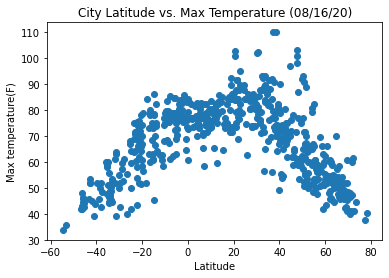

In [15]:
max_temp = new_df["Max Temp"]
Lat_df = new_df["Lat"]
plt.scatter(Lat_df, max_temp)
plt.xlabel('Latitude')
plt.ylabel('Max temperature(F)')
plt.title("City Latitude vs. Max Temperature (08/16/20)")
plt.show()

The scatter plot is comparing the Max temperature vs. Latitude.  The temperature increased closer to the equator and decreased when it was furthest from the equator.  

## Latitude vs. Humidity Plot

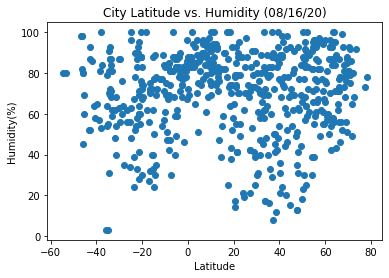

In [16]:
hum_df = new_df["Humidity"]
Lat_df = new_df["Lat"]
plt.scatter(Lat_df, hum_df)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs. Humidity (08/16/20)")
plt.show()

The scatter plot is comparing the Humidity(%) vs. Latitude.  The temperature increased closer to the equator and decreased when it was furthest from the equator.  

## Latitude vs. Cloudiness Plot

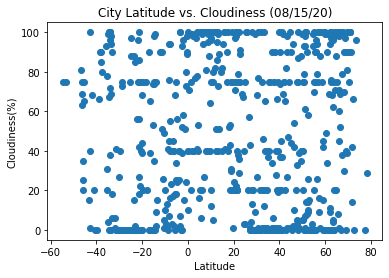

In [18]:
cloud_df = new_df["Cloudiness"]
Lat_df = new_df["Lat"]
plt.scatter(Lat_df, cloud_df)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs. Cloudiness (08/15/20)")
plt.show()

The scatter plot is comparing the Cloudiness vs. Latitude.  The temperature increased closer to the equator and decreased when it was furthest from the equator.  

## Latitude vs. Wind Speed Plot

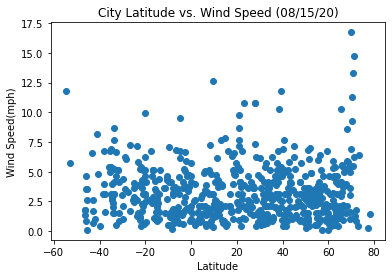

In [19]:
wind_df = new_df["Wind Speed"]
Lat_df = new_df["Lat"]
plt.scatter(Lat_df, wind_df)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("City Latitude vs. Wind Speed (08/15/20)")
plt.show()

The scatter plot is comparing the Wind Speed vs. Latitude.  The temperature increased closer to the equator and decreased when it was furthest from the equator.  

## Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.46434603523047585


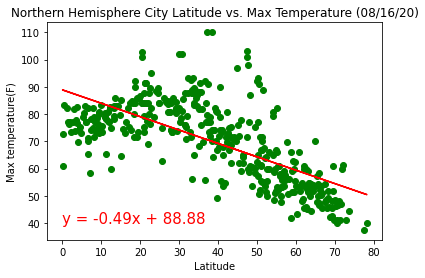

In [26]:
north_hem = new_df.loc[new_df["Lat"]>0]
max_temp = new_df["Max Temp"]
Lat_df = new_df["Lat"]
plt.scatter(north_hem["Lat"], north_hem["Max Temp"], facecolors="green")

x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max temperature(F)')
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (08/16/20)")

plt.annotate(line_eq,(0,40),fontsize=15,color="red")
print(f"R Val is {rvalue **2}")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression  

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression